# Week 8 Problem Set

## Homeworks

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**HW1.** *Breast Cancer Data:* Read Breast Cancer data using Pandas library:
- **Task 1:** Read the file: `breast_cancer_data.csv`:
    - [Download the CSV file](https://www.dropbox.com/s/1u8y8kzdltse4yd/data.csv?raw=1)
    - [Read Description of Data](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)
    - use comma `","` as field separator
    - use `"utf-8"` as encoding field

In [38]:
# Task 1
# Read file, replace the None
df = pd.read_csv("breast_cancer_data.csv", sep=",", encoding="utf-8")

###
### YOUR CODE HERE
###
display(df)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
assert isinstance(df, pd.DataFrame)
assert df.shape == (569, 32)
assert df.columns[0] == 'id' and df.columns[-1] == 'fractal_dimension_worst'

- **Task 2:** Find the number of rows and columns.


In [40]:
# Task 2
# get the shape
shape = df.shape

# get rows and columns from shape
row = shape[0]
col = shape[1]

###
### YOUR CODE HERE
###

print(row,col)



569 32


In [41]:
assert shape == (569, 32)
assert row == 569
assert col == 32

- **Task 3:** Find the name of all the columns.


In [42]:
# Task 3
# display the name of all the columns
names = df.columns

###
### YOUR CODE HERE
###

print(names)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [43]:
assert isinstance(names, pd.Index)
assert np.all(names == pd.Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']))

- **Task 4:** Create a subset data set containing only the following features:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - concavity (severity of concave portions of the contour)
    
**Make sure the data type is `pd.DataFrame`.**


In [44]:
# Task 4
# set the name of the columns for the subset of data
columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean']

# extract the columns, replace the None
df_features = df.loc[:, columns]



In [45]:
assert isinstance(df_features, pd.DataFrame)
assert df_features.columns[0] == 'radius_mean'
assert df_features.columns[-1] == 'concavity_mean'
assert df_features.shape == (569, 6)

- **Task 5:** Create a subset data set containing only the target from the column "diagnosis". 

**Make sure the data type is `pd.DataFrame`.**

In [46]:
#5.
# extract target
df_target = pd.DataFrame(df.loc[:, 'diagnosis'])

###
### YOUR CODE HERE
###

df_target

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [47]:
assert isinstance(df_target, pd.DataFrame)
assert df_target.shape == (569, 1)
assert df_target.columns[0] == 'diagnosis'

- **Task 6:** Create a new Data Frame from the column "diagnosis", called "diagnosis_int" which is the integer representation of the column diagnosis. Copy the column into the original data frame so that it has a copy.
    - if the value in "diagnosis" column is "M", the value in the column "diagnosis_int" should be set to 1
    - otherwise, it should be set to 0
    
*Hint: use `.apply()` method.*


In [48]:
# Task 6
# creating diagnosis_int
df_target["diagnosis_int"] = df_target['diagnosis'].apply(lambda x: 1 if x == "M" else 0)

# copy the new column into the original data frame
df["diagnosis_int"] = np.copy(df_target["diagnosis_int"])

###
### YOUR CODE HERE
###

display(df_target)
display(df["diagnosis_int"])

,diagnosis,diagnosis_int
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1
...,...,...
564,M,1
565,M,1
566,M,1
567,M,1


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_int, Length: 569, dtype: int64

In [49]:
assert isinstance(df_target, pd.DataFrame) and isinstance(df, pd.DataFrame)
assert df_target.shape == (569, 2)
assert np.all(df_target.columns == ["diagnosis", "diagnosis_int"])
assert "diagnosis_int" in df.columns

- **Task 7:** Use scatter plot to see the relationship between "radius_mean" and "diagnosis_int". 
    - Use the "diagnosis" column as the `hue` for the scatter plot.
    - Label the x axis as "Mean of Cell Radius"
    - Label the y axis as "1: Malignant, 0: Benign"

Text(0, 0.5, '1: Malignant, 0: Benign')

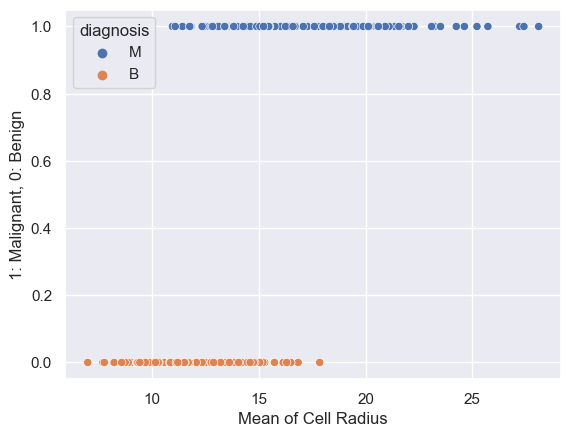

In [50]:
# Task 7
# set the default theme to use Seaborn
sns.set()

# display using scatter plot
myplot = sns.scatterplot(data=df, x="radius_mean", y="diagnosis_int", hue="diagnosis")

# set the x label
myplot.set_xlabel("Mean of Cell Radius")
myplot.set_ylabel("1: Malignant, 0: Benign")
# set the y label

###
### YOUR CODE HERE
###


- **Task 8:** Use scatter plot to see the relationship between "concavity_mean" and "diagnosis_int". 
    - Use the "diagnosis" column as the `hue` for the scatter plot.
    - Label the x axis as "Mean of Cell Concavity"
    - Label the y axis as "1: Malignant, 0: Benign"

Text(0, 0.5, '1: Malignant, 0: Benign')

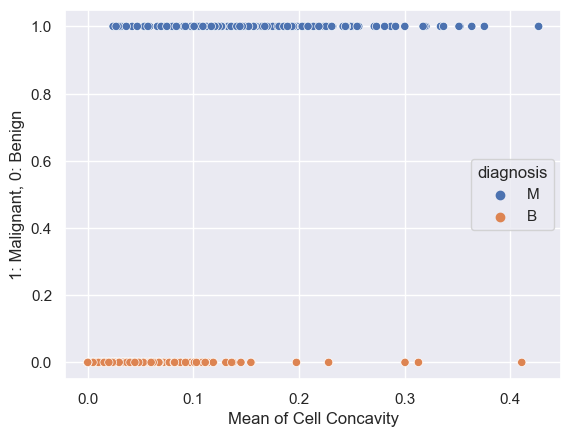

In [51]:
# Task 8
# set the default theme to use Seaborn
sns.set()

# display using scatter plot
myplot = sns.scatterplot(data=df, x="concavity_mean", y="diagnosis_int", hue="diagnosis")

# set the x label
myplot.set_xlabel("Mean of Cell Concavity")
myplot.set_ylabel("1: Malignant, 0: Benign")

# set the y label

###
### YOUR CODE HERE
###


**HW2.** *Count Plot:* Create a function to count how many records are diagnosed as Malignant and Benign. The function should return a tuple: `(n_malignant, n_benign)`, where `n_malignant` is the number of records diagnosed as Malignant cell and `n_benign` is the number of records diagnosed as Benign.

Use Count plot to verify the answer.

Reference:
- [Count Plot](https://seaborn.pydata.org/generated/seaborn.countplot.html)


In [52]:
def count_cell(target):
    n_malignant = 0
    n_benign = 0
    # for cell in target:
    #     if cell == "M":
    #         n_malignant += 1
    #     else:
    #         n_benign += 1
    n_benign, n_malignant = target.value_counts()
        
    return (n_malignant, n_benign)


In [53]:
result = count_cell(df_target["diagnosis"])
assert result == (212, 357)

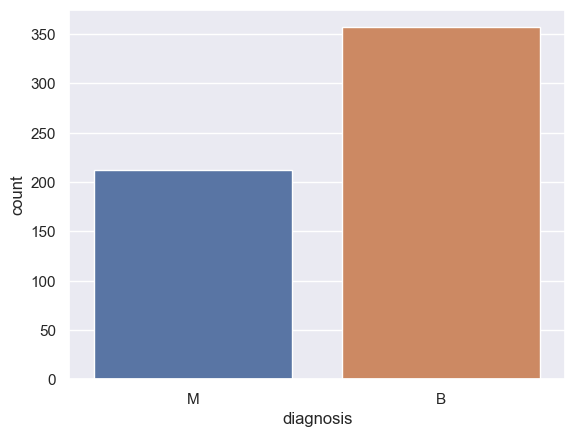

In [54]:
# write the code to plot the count of the two classes
myplot = sns.countplot(data=df_target, x='diagnosis')

###
### YOUR CODE HERE
###


**HW3.** *Normalization:* Create a function that takes in Data Frame as the input and returns the normalized Data Frame as the output. **Each column** is normalized separately using **min-max normalization**. The function should return a new data frame instead of modifying the input data frame.

$$normalized = \frac{data - min}{max - min}$$

Use the following functions from Pandas or Numpy:
- `df.copy()`: This is to create a new copy of the data frame.
- `df.min(axis=0)`: This is to get the minimum along the index axis.
- `df.max(axis=0)`: This is to get the maximum along the index axis.

Note: Your function should be able to handle a numpy array as well as Panda's data frame. 

In [55]:
def normalize_minmax(dfin):
    dfout = dfin.copy()
    dfout_min = dfout.min(axis=0)
    normalized_data = (dfout - dfout_min)/(dfout.max(axis=0)-dfout_min)
    return normalized_data

In [56]:
data_norm = normalize_minmax(df_features)
stats = data_norm.describe()
display(stats)
assert stats.loc["max", "radius_mean"] == 1.0 and \
       stats.loc["min", "radius_mean"] == 0 and \
       np.isclose(stats.loc["mean", "radius_mean"], 0.338222)
assert stats.loc["max", "texture_mean"] == 1.0 and \
       stats.loc["min", "texture_mean"] == 0 and\
       np.isclose(stats.loc["mean", "texture_mean"], 0.323965)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.208058
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.186785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.069260
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.144189
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.306232
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
data_norm = normalize_minmax(df_features.to_numpy())
assert data_norm[:,0].max() == 1.0 and \
       data_norm[:,0].min() == 0 and \
       np.isclose(data_norm[:,0].mean(), 0.338222)
assert data_norm[:,1].max() == 1.0 and \
       data_norm[:,1].min() == 0 and\
       np.isclose(data_norm[:,1].mean(), 0.323965)


**HW4.** *Splitting the Data:* Use the function to split the breast cancer data set into a training data set and a testing data set. Use `random_state=100` and `test_size=0.3` and the normalized features data set from the previous exercise.

In [58]:
# copy your answer from the cohort problem

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes = df_feature.index
    k = int(len(indexes) * test_size)
    if random_state:
        np.random.seed(random_state)
    test_indexes = set(np.random.choice(indexes, k, replace=False))
    train_indexes = set(indexes) - test_indexes
    df_feature_train = df_feature.loc[list(train_indexes), :]
    df_feature_test = df_feature.loc[list(test_indexes), :]
    df_target_train = df_target.loc[list(train_indexes), :]
    df_target_test = df_target.loc[list(test_indexes), :]
    return df_feature_train, df_feature_test, df_target_train, df_target_test
 

In [59]:
# call normalize_minmax() to normalize df_features
data_norm = normalize_minmax(df_features)

###
### YOUR CODE HERE
###

# call split_data() with seed of 100 and test size of 30%
datasets_tupple = split_data(data_norm, df_target, random_state=100, test_size=0.3)
###
### YOUR CODE HERE
###



In [60]:
df_features_train = datasets_tupple[0]
df_features_test = datasets_tupple[1]
df_target_train = datasets_tupple[2]
df_target_test = datasets_tupple[3]

display(df_features_train.describe())
display(df_features_test.describe())
display(df_target_train.describe())
display(df_target_test.describe())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,0.333843,0.321152,0.328356,0.213183,0.392278,0.201825
std,0.166840,0.144358,0.167443,0.147846,0.124632,0.176979
min,0.000000,0.022658,0.000000,0.000000,0.000000,0.000000
25%,0.221922,0.212716,0.213358,0.117455,0.303151,0.064246
50%,0.294808,0.306392,0.288093,0.167635,0.390268,0.144822
75%,0.415732,0.408522,0.413655,0.268823,0.473684,0.297446
max,1.000000,1.000000,1.000000,0.999152,1.000000,1.000000


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,0.348501,0.330568,0.343681,0.225691,0.400669,0.222689
std,0.166702,0.148211,0.169025,0.152656,0.132475,0.207818
min,0.079985,0.000000,0.073457,0.035504,0.105263,0.000000
25%,0.223816,0.235374,0.219594,0.117253,0.309335,0.073811
50%,0.312083,0.321948,0.300428,0.179130,0.395053,0.138086
75%,0.425316,0.408860,0.428339,0.278738,0.481583,0.322399
max,0.967343,0.806561,0.988943,1.000000,0.811321,0.999063


,diagnosis_int
count,399.000000
mean,0.358396
std,0.480131
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


,diagnosis_int
count,170.000000
mean,0.405882
std,0.492513
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [61]:
assert isinstance(df_features_train, pd.DataFrame)
assert isinstance(df_features_test, pd.DataFrame)
assert isinstance(df_target_train, pd.DataFrame)
assert isinstance(df_target_test, pd.DataFrame)

assert df_features_train.shape == (399, 6)
assert df_features_test.shape == (170, 6)
assert df_target_train.shape == (399, 2)
assert df_target_test.shape == (170, 2)

assert np.isclose(df_features_train.mean().mean(), 0.29844) 
assert np.isclose(df_features_test.mean().mean(), 0.311966) 
assert np.isclose(df_target_train.mean().mean(), 0.358396) 
assert np.isclose(df_target_test.mean().mean(), 0.40588) 

C:\Users\keith\AppData\Local\Temp\ipykernel_21620\2418975449.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  assert np.isclose(df_target_train.mean().mean(), 0.358396)
C:\Users\keith\AppData\Local\Temp\ipykernel_21620\2418975449.py:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  assert np.isclose(df_target_test.mean().mean(), 0.40588)


**HW5.** *Pair Plot:* Use pair plot to find out the relationship between different columns in `df_features`. Ensure that similar relationship exists in both the training and the test datasets.

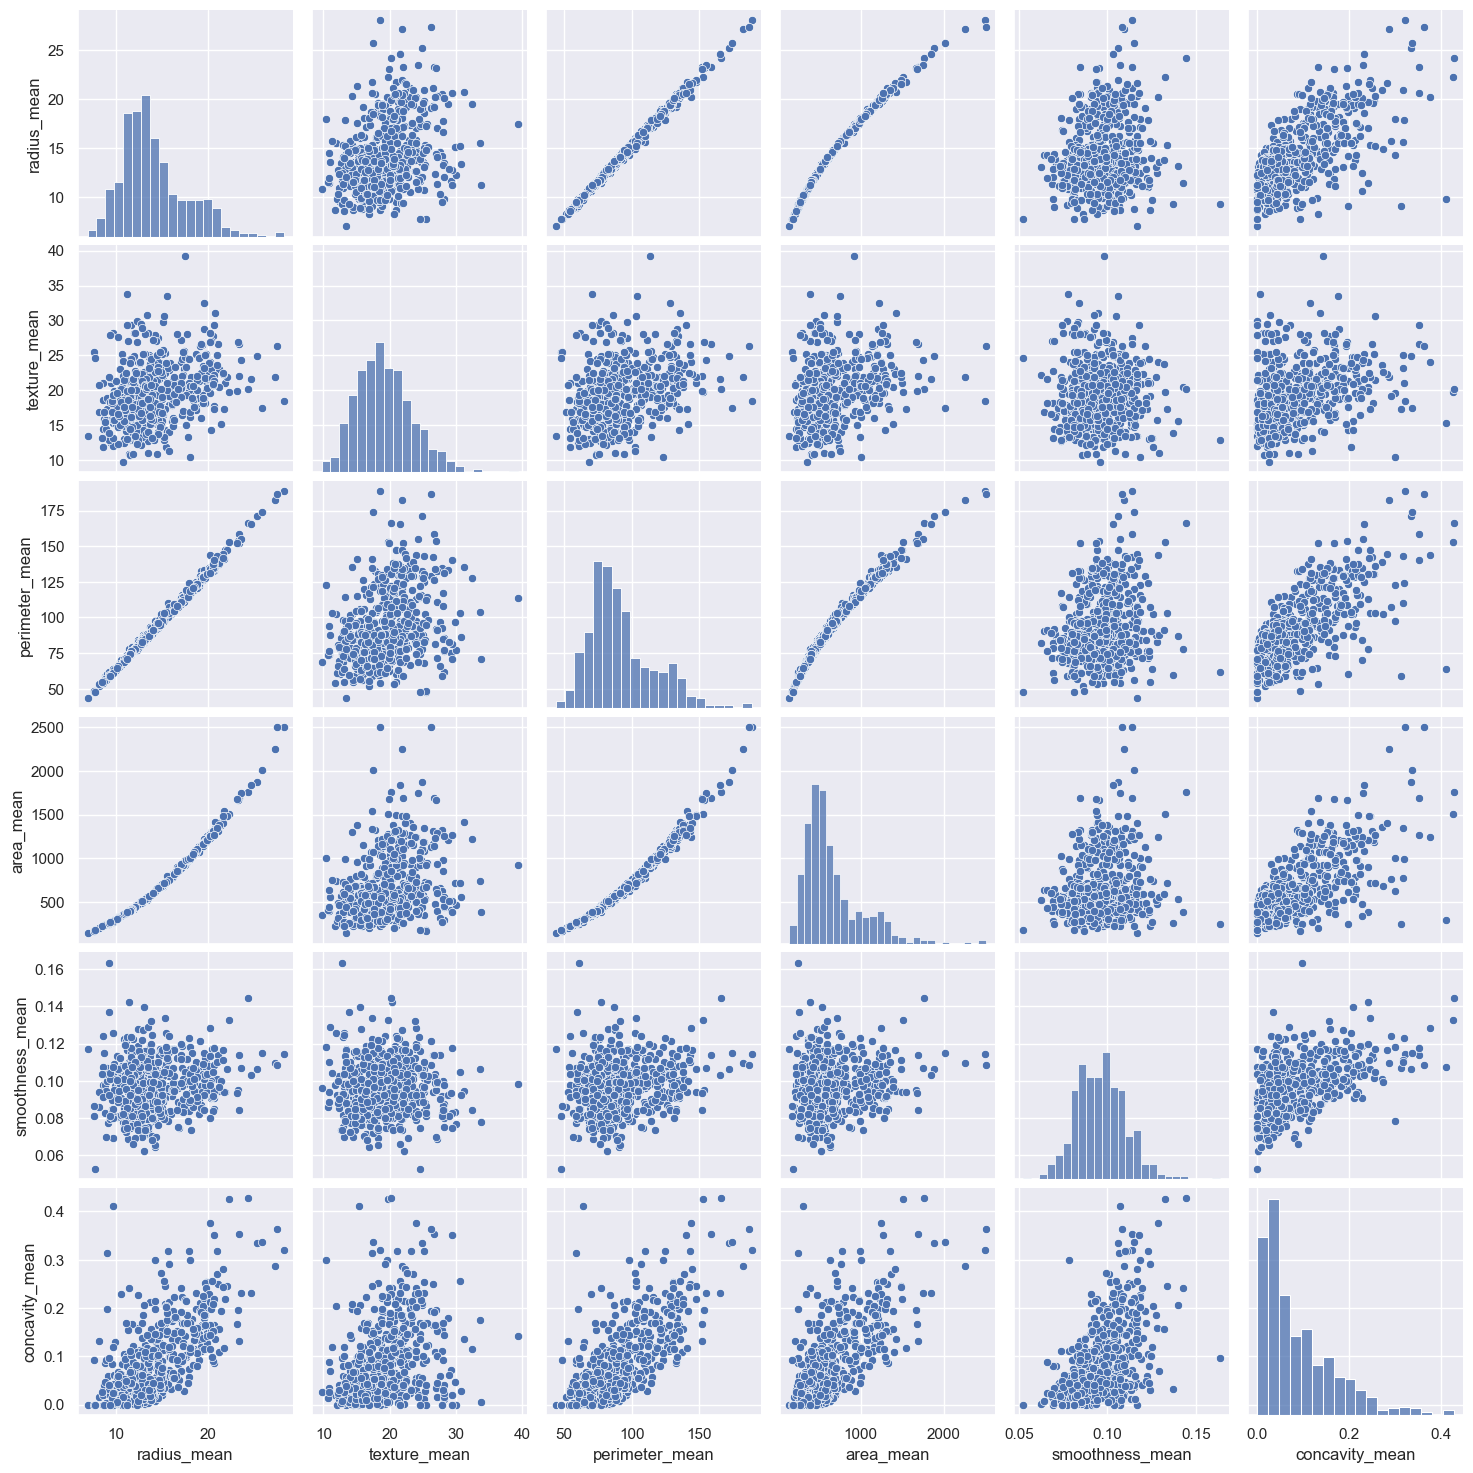

In [62]:
# write your code below to plot for df_features
myplot = sns.pairplot(data=df_features)

###
### YOUR CODE HERE
###


In [63]:
# write your code below to plot for df_features_train
myplot = sns.pairplot(data=df_features_train)

###
### YOUR CODE HERE
###


Error in callback <function flush_figures at 0x0000017B7AA6FD00> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# write your code below to plot for df_features_test
myplot = sns.pairplot(data=df_features_test)

###
### YOUR CODE HERE
###
